In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [2]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_rep_email from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
df = df.dropna()
df['inc_rep_email'] = df['inc_rep_email'].str.split("@",n=1,expand=True)[0]
df.head()

,inc_rep_email
2,SarahJane.Tafalla
3,sharon.cooper
4,manoloriera
5,vicki.fisher
6,vicki.fisher


In [3]:
email_counts = df['inc_rep_email'].value_counts(ascending=True)
df_counted = df
for email,count in email_counts.iteritems():
    if count <= 15:
        df_counted.loc[df_counted['inc_rep_email'] == email, 'inc_rep_email'] = 'Other'
email_counts_min = df_counted['inc_rep_email'].value_counts(ascending=True)
email_counts_min = email_counts_min.drop('Other')
print(email_counts_min)

elizabeth.joseph          16
sophie.lidstone           16
clare.becaus              16
nicola.hill               16
sarah.thomas              16
kelly.ford                16
jade.campbell             16
emma.hume                 17
lynda.worley2             17
elizabeth.lane            17
francesca.dipple          17
sara.brasalves            17
giuseppe.rufini           18
anthony.woodhouse         18
rhys.jones                18
samantha.patterson        18
max.williams              18
Eloise.Lavington          18
colin.beevor              18
louise.stacey             18
caroline.clokemanchip     18
lucinda.fellows           19
joseph.tooley             19
louise.barker             20
sarah.martin1             20
katherine.walpole         20
hannah.kingston           20
charlotte.cousins         21
jessica.couzens           21
amanda.johnson            22
                        ... 
janine.macdonald          28
annie.ng                  28
mandy.houghton            30
nazeer.padma  

<BarContainer object of 80 artists>

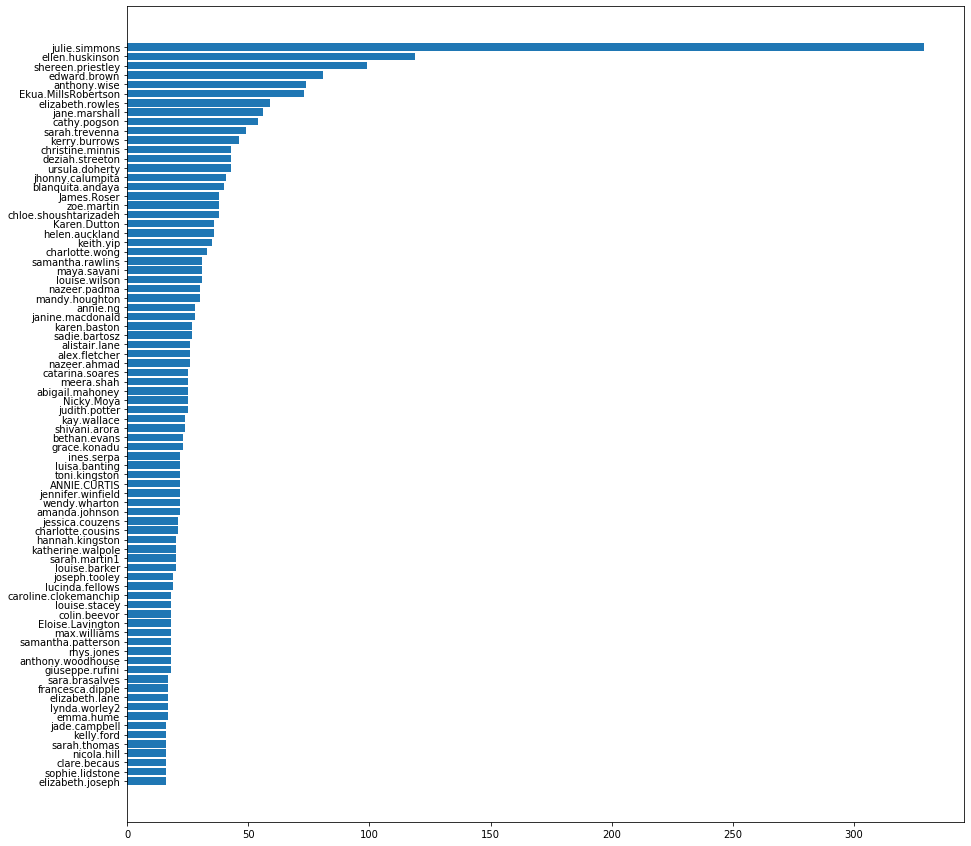

In [4]:
plt.figure(figsize=(15,15))
plt.barh(email_counts_min.index,email_counts_min.values)

1      1658
2       535
3       240
4       160
5       102
6        63
7        52
8        41
9        22
10       24
11       15
12       15
13        5
14       12
15        9
16        7
17        5
18        9
19        2
20        4
21        2
22        7
23        2
24        2
25        5
26        3
27        2
28        2
30        2
31        3
33        1
35        1
36        2
38        3
40        1
41        1
43        3
46        1
49        1
54        1
56        1
59        1
73        1
74        1
81        1
99        1
119       1
329       1
Name: inc_rep_email, dtype: int64
(0, 1]       1658
(1, 2]        535
(2, 3]        240
(3, 4]        160
(4, 5]        102
(5, 6]         63
(6, 7]         52
(7, 8]         41
(8, 9]         22
(9, 10]        24
(10, 11]       15
(11, 12]       15
(12, 13]        5
(13, 14]       12
(14, 15]        9
(15, 16]        7
(16, 17]        5
(17, 18]        9
(18, 20]        6
(20, 30]       27
(30, 40]       11
(40, 50]    

<BarContainer object of 24 artists>

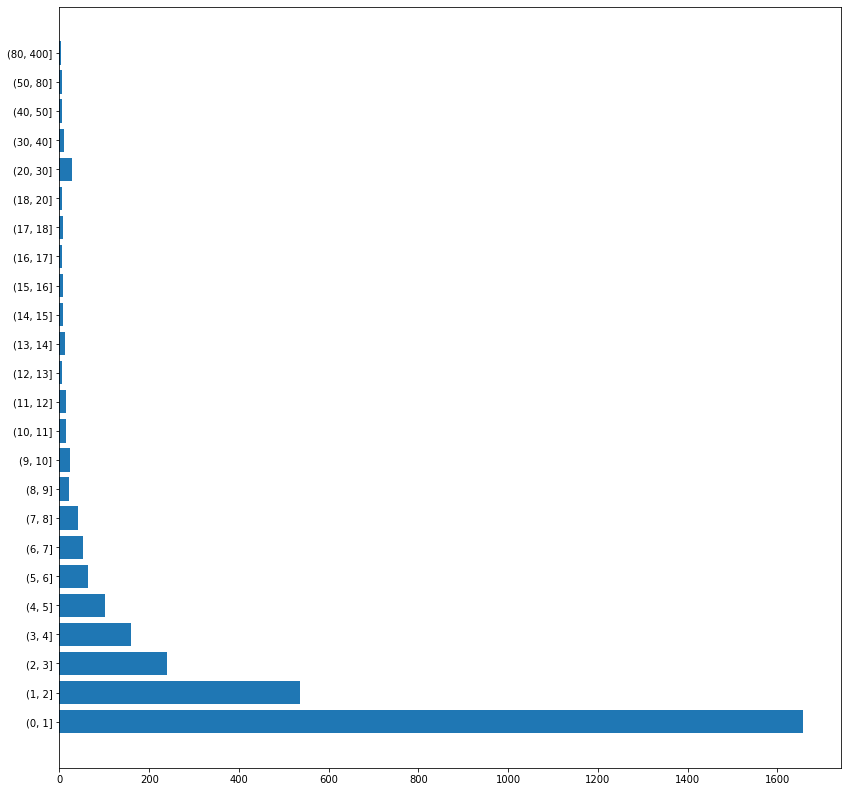

In [5]:
people_per_counts = email_counts.value_counts()[email_counts.unique()]
print(people_per_counts)
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,30,40,50,80,400]
people_per_counts_binned = people_per_counts.groupby(pd.cut(people_per_counts.index,bins)).sum()
print(people_per_counts_binned)
plt.figure(figsize=(14,14))
string_bins = people_per_counts_binned.index.astype(str)
print(string_bins)
plt.barh(string_bins,people_per_counts_binned.values)

In [6]:
cumulative_num_people = []
cumulative_percentages = []
num_people = people_per_counts.values.sum()
percentage = 100
for i in range(len(people_per_counts)):
    cumulative_num_people.append(str(num_people))
    num_people -= people_per_counts.values[i]
    cumulative_percentages.append(percentage)
    percentage -= 100*people_per_counts.index[i]*people_per_counts.values[i]/email_counts.values.sum()
red_percentages = [100-percentage for percentage in cumulative_percentages]

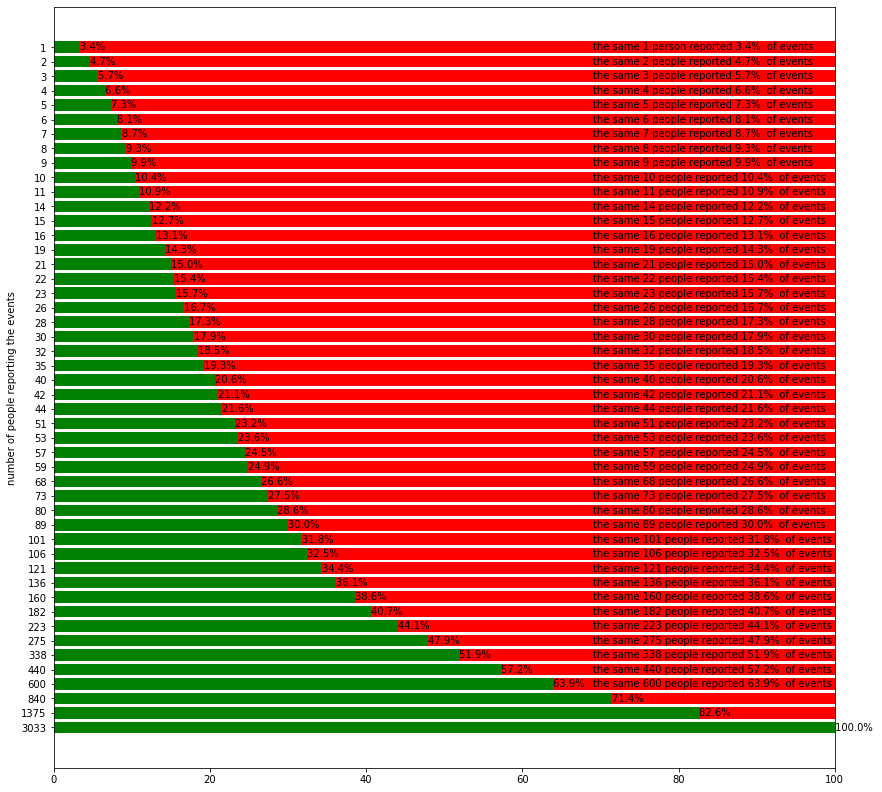

In [7]:
plt.figure(figsize=(14,14))
plt.barh(cumulative_num_people,cumulative_percentages,color='g')
plt.barh(cumulative_num_people,red_percentages,left=cumulative_percentages,color='r')
plt.ylabel('number of people reporting the events')
for i, percentage in enumerate(cumulative_percentages):
    plt.text(percentage,i-0.2,"{0:.1f}% ".format(percentage))
    if int(cumulative_num_people[i])!=1 and i>2: 
        plt.text(69,i-0.2,"the same "+cumulative_num_people[i]+" people reported "+"{0:.1f}% ".format(percentage)+" of events")
plt.text(69,len(cumulative_percentages)-1-0.2,"the same 1 person reported "+"{0:.1f}% ".format(percentage)+" of events");

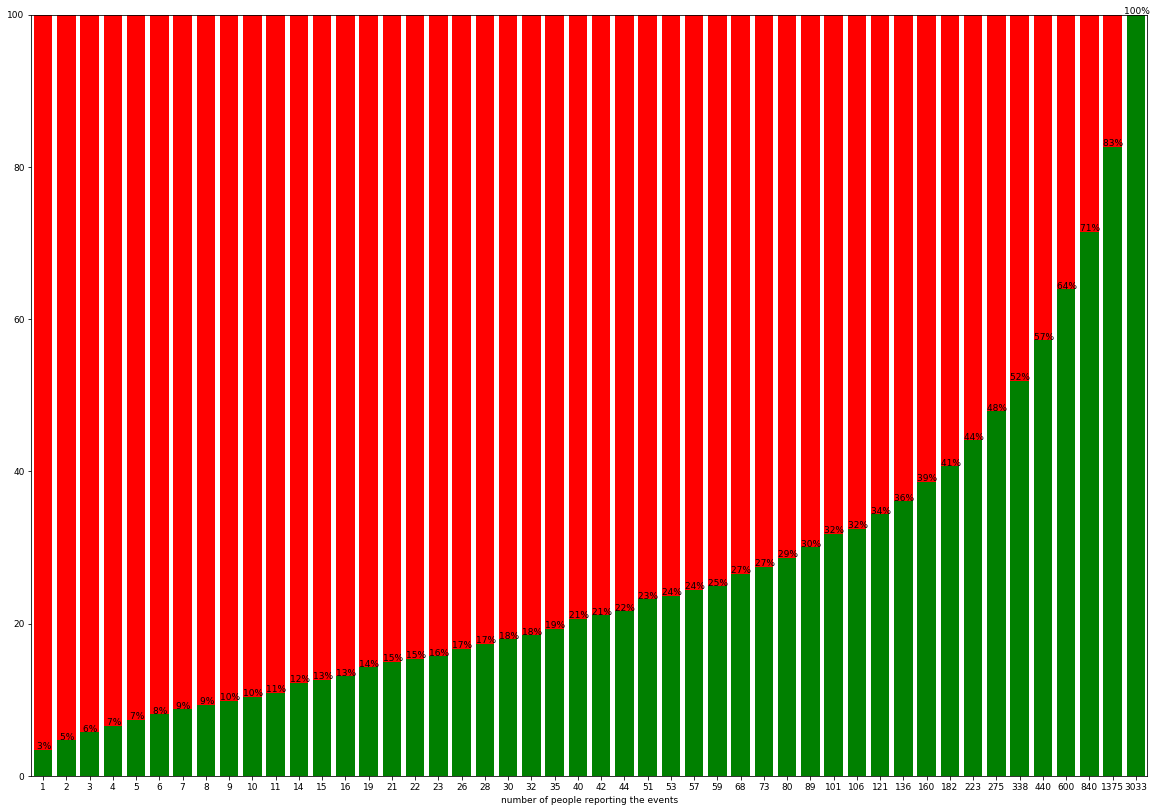

In [27]:
plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(20,14))
plt.bar(cumulative_num_people,cumulative_percentages,color='g')
plt.bar(cumulative_num_people,red_percentages,bottom=cumulative_percentages,color='r')
plt.xlabel('number of people reporting the events');
plt.xlim(-0.5,47.5)
plt.gca().invert_xaxis()
for i, percentage in enumerate(cumulative_percentages):
    plt.text(i-0.1,percentage+0.1,"{0:.0f}% ".format(percentage),ha='center')